In [1]:
import os
import csv
import pandas as pd
import numpy as np
from skimage import io
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [2]:
def list_files_in_folder(folder_path):
    filenames = os.listdir(folder_path)
    return filenames

def write_filenames_to_csv(filenames, parameterized_string, csv_file_path):
    with open(csv_file_path, 'a', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Filename', 'Parameterized String'])  # header row
        for filename in filenames:
            writer.writerow([filename, parameterized_string])
            
def get_all_dir_paths(start_dir):
    paths = []
    for root, dirs, files in os.walk(start_dir):
        for dir in dirs:
            full_path = os.path.join(root, dir)
            paths.append(full_path)
    return paths

def image_to_array(image_path):
    img = io.imread(image_path)
    return img

def label_images(start_dir):
    dir_paths = get_all_dir_paths(start_dir)
    data = []
    for folder_path in dir_paths:
        label = folder_path.split("\\")[7]
        filenames = list_files_in_folder(folder_path)
        for filename in filenames:
            data.append({'filename': filename, 'label': label, 'image': image_to_array(folder_path+'/'+filename)})
    return data

def label_encode(series: pd.Series) -> pd.Series:
    """
    Perform label encoding on a Pandas Series.
    Args:
        series (pd.Series): The series to be encoded.
    Returns:
        pd.Series: The encoded series.
    """
    le = LabelEncoder()
    encoded_series = series.apply(le.fit_transform)
    return encoded_series

def one_hot_encode(series):
    """
    Convert a pandas Series of labels to a one-hot encoded numpy array.
    Parameters:
    series (pd.Series): Series of labels to be one-hot encoded.
    Returns:
    np.array: One-hot encoded matrix.
    """
    # Extract unique classes and their count
    unique_classes = series.unique()
    num_classes = len(unique_classes)

    # Create a mapping from class labels to indices
    class_to_index = {cls: idx for idx, cls in enumerate(unique_classes)}

    # Initialize the one-hot encoded matrix with zeros
    one_hot_matrix = np.zeros((len(series), num_classes))

    # Set the appropriate element to 1 for each label
    for i, label in enumerate(series):
        index = class_to_index[label]
        one_hot_matrix[i, index] = 1

    return one_hot_matrix

# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')

    plt.show()

In [3]:
# ### Push Filenames and lables into PANDAS DF
# lables = []
# for folder_path in paths:
#     label = (folder_path.split("\\")[7])
#     filenames = list_files_in_folder(folder_path)
#     write_filenames_to_csv(filenames, label, csv_file_path)

In [4]:
start_dir = r"C:\Users\Manideep S\OneDrive - COGNINE\ML\AnimalHQ\train"
csv_file_path = 'lables.csv'
lables = []
data = label_images(start_dir)
df = pd.DataFrame(data)
print(df)
print(df["label"].unique())

                     filename label  \
0      pixabay_cat_004283.jpg   cat   
1      pixabay_cat_004284.jpg   cat   
2      pixabay_cat_004285.jpg   cat   
3      pixabay_cat_004286.jpg   cat   
4      pixabay_cat_004287.jpg   cat   
...                       ...   ...   
1495  pixabay_wild_001249.jpg  wild   
1496  pixabay_wild_001250.jpg  wild   
1497  pixabay_wild_001251.jpg  wild   
1498  pixabay_wild_001252.jpg  wild   
1499  pixabay_wild_001253.jpg  wild   

                                                  image  
0     [[[84, 31, 13], [84, 31, 13], [85, 32, 14], [8...  
1     [[[70, 68, 55], [71, 69, 56], [73, 71, 58], [7...  
2     [[[94, 51, 32], [94, 51, 32], [94, 51, 32], [9...  
3     [[[71, 64, 72], [76, 69, 77], [77, 72, 79], [7...  
4     [[[6, 6, 6], [6, 6, 6], [6, 6, 6], [6, 6, 6], ...  
...                                                 ...  
1495  [[[103, 107, 72], [104, 108, 73], [105, 109, 7...  
1496  [[[7, 24, 5], [6, 23, 4], [5, 22, 3], [4, 21, ...  
1497  [[[

In [5]:
# def iterable(x):
#     if isinstance(x, str): return False
#     try:
#         iter(x)
#     except TypeError:
#         return False
#     return True

# def dimensionality(l):
#     if not iterable(l): return 0
#     return 1 + dimensionality(l[0])

# print(dimensionality(df.image[0][0][0][0]))
# print("88888\n",df.image[0],len(df.image[0]))
# print("77777\n",df.image[0][0], len(df.image[0][0]))
# print("66666\n",df.image[0][0][0], len(df.image[0][0][0]))

In [6]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

def normalize_image(image):
    return image / 255.0

train_images = train_df['image'].apply(normalize_image)
test_images = test_df['image'].apply(normalize_image)

In [ ]:
le = LabelEncoder()


# Fit and transform the train labels
train_labels = le.fit_transform(train_df['label'])

# Transform the test labels (use transform, not fit_transform)
test_labels = le.transform(test_df['label'])

print("Train labels (encoded):", train_labels)
print("Test labels (encoded):", test_labels)

Train labels (encoded): [0 1 2 ... 1 2 2]
Test labels (encoded): [2 2 0 0 0 1 2 1 2 0 1 2 1 2 0 2 2 1 0 0 2 2 2 2 2 0 2 2 2 2 2 1 2 2 0 0 0
 0 2 0 2 0 2 1 2 0 0 0 1 1 1 1 2 2 1 1 0 0 0 1 1 1 0 0 1 0 0 2 2 0 0 1 1 0
 1 2 1 1 0 1 2 0 0 1 1 0 1 1 1 1 2 0 0 2 2 0 0 0 2 0 1 1 2 2 0 0 0 2 0 1 0
 2 1 0 0 0 1 0 0 2 1 2 2 0 0 2 2 1 2 0 2 0 2 2 1 0 0 0 1 0 2 0 2 0 1 2 1 2
 0 1 2 2 1 2 1 2 2 0 0 0 0 0 2 2 0 0 2 2 1 0 0 2 1 1 0 0 2 1 0 2 0 1 0 0 2
 1 1 0 2 2 1 1 2 2 1 0 1 0 1 0 1 1 0 0 2 1 0 1 0 1 0 2 1 2 0 0 2 0 2 0 2 1
 1 1 0 0 0 0 2 2 2 0 1 2 2 2 2 2 2 2 1 2 1 0 1 1 2 2 2 1 2 0 2 1 2 1 0 1 1
 2 2 0 1 1 2 2 1 0 2 1 0 0 0 2 1 2 2 2 0 2 2 2 2 1 0 1 0 2 0 2 1 2 0 2 1 1
 1 2 2 1]


In [ ]:
le = LabelEncoder()
train_labels = le.fit_transform(train_df['label'])
test_labels = le.fit_transform(test_df['label'])

In [ ]:
print(type(train_images))
print(type(train_labels))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [ ]:
image_shape = (512, 512, 3)  # adjust to your image shape

In [ ]:
print(train_images)
print(train_labels)

382     [[[0.6, 0.5725490196078431, 0.4980392156862745...
538     [[[0.8784313725490196, 0.9294117647058824, 0.9...
1493    [[[0.10980392156862745, 0.12156862745098039, 0...
1112    [[[0.4, 0.49019607843137253, 0.388235294117647...
324     [[[0.6509803921568628, 0.6235294117647059, 0.5...
                              ...                        
1130    [[[0.37254901960784315, 0.5137254901960784, 0....
1294    [[[0.011764705882352941, 0.00784313725490196, ...
860     [[[0.5215686274509804, 0.5294117647058824, 0.5...
1459    [[[0.7098039215686275, 0.5568627450980392, 0.4...
1126    [[[0.6431372549019608, 0.6941176470588235, 0.7...
Name: image, Length: 1200, dtype: object
[0 1 2 ... 1 2 2]


In [ ]:
x_train = train_images.to_numpy()
x_train = np.stack(x_train, axis=0)
y_train = np.stack(train_labels, axis=0)

x_test = test_images.to_numpy()
x_test = np.stack(x_test, axis=0)
y_test = np.stack(test_labels, axis=0)

In [ ]:
print(type(x_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print(x_train.shape)

(1200, 512, 512, 3)


In [ ]:
x_train = x_train.reshape(len(x_train), 512, 512,3)
y_train = y_train.reshape(len(y_train), 1)

x_test = x_test.reshape(len(x_test), 512, 512, 3)
y_test = y_test.reshape(len(y_test), 1)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1200, 512, 512, 3)
(1200, 1)
(300, 512, 512, 3)
(300, 1)


In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
# import numpy as np

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(512,512,3)),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

d:\anaconda\envs\myLLM\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=5, batch_size=10, validation_split=0.1)

Epoch 1/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 328s 1s/step - accuracy: 0.4496 - loss: 4.6249 - val_accuracy: 0.8000 - val_loss: 0.6030
Epoch 2/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 94s 863ms/step - accuracy: 0.8520 - loss: 0.4330 - val_accuracy: 0.8500 - val_loss: 0.3357
Epoch 3/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 93s 854ms/step - accuracy: 0.9708 - loss: 0.1287 - val_accuracy: 0.8667 - val_loss: 0.2923
Epoch 4/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 93s 857ms/step - accuracy: 0.9974 - loss: 0.0256 - val_accuracy: 0.9000 - val_loss: 0.1780
Epoch 5/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 93s 858ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.9583 - val_loss: 0.1107


In [ ]:
model.evaluate(x_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 412ms/step - accuracy: 0.8820 - loss: 0.4276


[0.4701129198074341, 0.8766666650772095]

In [ ]:
model.save("trained_cnn_for_image_pred_cat_dog_wild_v1.h5")

In [ ]:
model.save("trained_cnn_for_image_pred_cat_dog_wild_v1.keras")

In [ ]:
def load_model(filename):
    model = tf.keras.models.load_model(filename)
    print(f"Model loaded from {filename}")
    return model

In [ ]:
def make_predictions(model, x_test):
    predictions = model.predict(x_test)
    return predictions

In [ ]:
def visualize_predictions(predictions, x_test, y_test, num_samples=5):
    class_names = ["cat", "dog", "wild"]
    for i in range(num_samples):
        plt.imshow(x_test[i])
        plt.title(f"Prediction: {class_names[np.argmax(predictions[i])]}")
        plt.xlabel(f"Actual: {class_names[int(y_test[i])]}")
        plt.show()

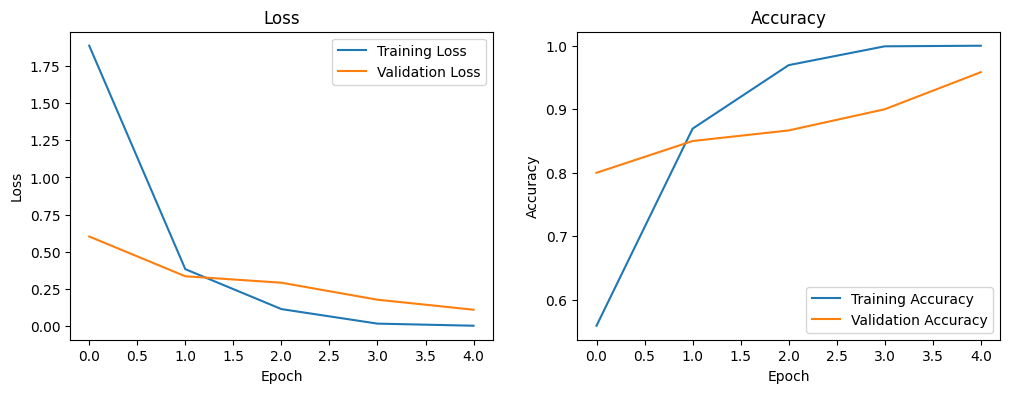

Model loaded from trained_cnn_for_image_pred_cat_dog_wild_v1.h5
10/10 ━━━━━━━━━━━━━━━━━━━━ 32s 668ms/step


C:\Users\Manideep S\AppData\Local\Temp\ipykernel_27424\961307739.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(f"Actual: {class_names[int(y_test[i])]}")


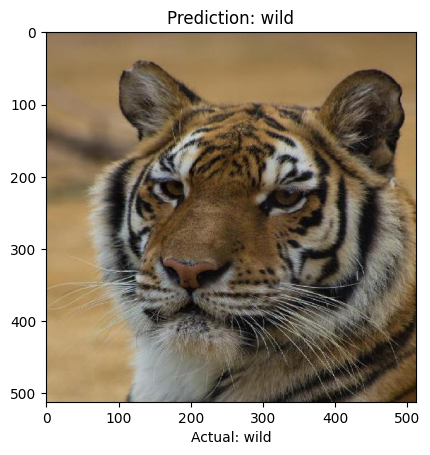

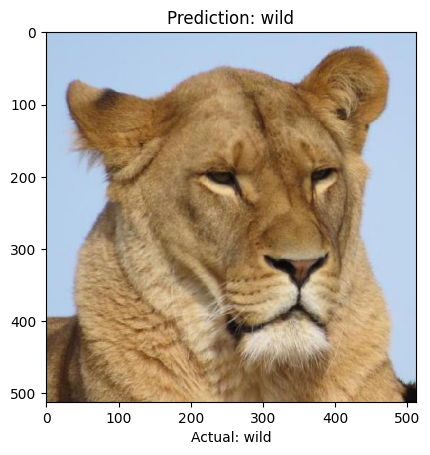

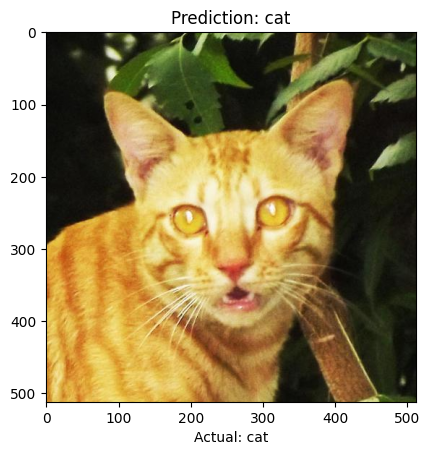

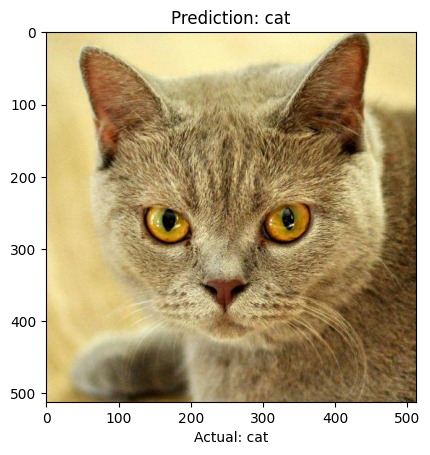

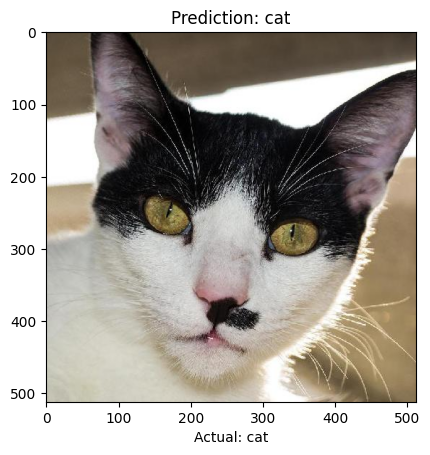

In [ ]:
plot_history(history)

# Load the model
loaded_model = load_model("trained_cnn_for_image_pred_cat_dog_wild_v1.h5")

# Make predictions
predictions = make_predictions(loaded_model, x_test)

# Visualize predictions
visualize_predictions(predictions, x_test, y_test)